# Simulations light inter

In [1]:
from __future__ import annotations

import sys
import time as t

import matplotlib.pyplot as plt
import numpy as np

sys.path.append("../data") 
from archi_dict import archi_maize as archi
from oawidgets.plantgl import *  # noqa: F403

from openalea.archicrop.display import build_scene, display_scene  # noqa: F401
from openalea.archicrop.simulation import plot_constrainted_vs_realized, run_simulations
from openalea.plantgl.all import Color3, Material, Scene  # noqa: F401

%gui qt

In [2]:
stics_color = "orange"
archicrop_color = "green"

In [3]:
tec_file_xml='../data/Mais_tec.xml'
plt_file_xml='../data/corn_plt.xml'
stics_output_file='../data/mod_smaize.sti'
weather_file = '../data/climaisj.meteo'
location = {  
'longitude': 3.87,
'latitude': 45,
'altitude': 800,
'timezone': 'Europe/Paris'}

In [4]:

start_time = t.time()

daily_dynamics, params_sets, pot_la, pot_h, realized_la, realized_h, nrj_per_plant, mtgs, filters, sowing_density = run_simulations(
    archi_params=archi, 
    tec_file=tec_file_xml, 
    plant_file=plt_file_xml, 
    dynamics_file=stics_output_file, 
    weather_file=weather_file,
    location=location,
    n_samples=100,
    latin_hypercube=True,
    opt_filter_organ_duration=False,
    opt_filter_pot_growth=True,
    opt_filter_realized_growth=True,
    light_inter=False,
    seed=42)

end_time = t.time()
_
elapsed_time = (end_time - start_time)/60
print(f"Elapsed time: {elapsed_time:.4f} minutes for {len(realized_la)} simulations")  # noqa: T201


Elapsed time: 2.1139 minutes for 0 simulations


In [5]:
# Retrieve STICS growth and senescence dynamics
dates = [value["Date"] for value in daily_dynamics.values()]
thermal_time = [value["Thermal time"] for value in daily_dynamics.values()]
leaf_area_plant = [value["Plant leaf area"] for value in daily_dynamics.values()]
sen_leaf_area_plant = [value["Plant senescent leaf area"] for value in daily_dynamics.values()]
height_canopy = [value["Plant height"] for value in daily_dynamics.values()]
par_incident = [value["Incident PAR"] for value in daily_dynamics.values()]
par_stics = [value["Absorbed PAR"] for value in daily_dynamics.values()]

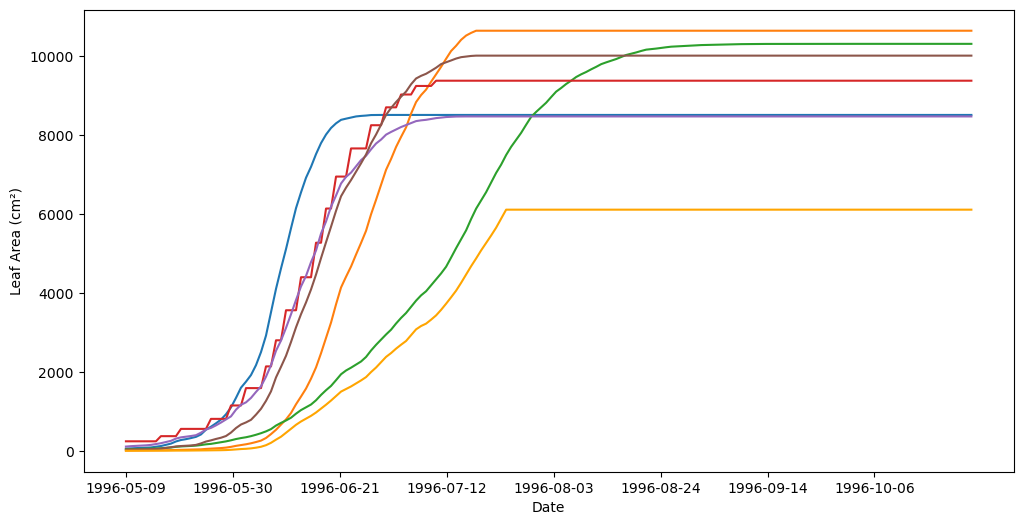

In [6]:
fig, ax = plt.subplots(figsize=(12, 6))
for la in pot_la.values():
    ax.plot(dates, la) # , color=archicrop_color, alpha=0.6)
ax.plot(dates, leaf_area_plant, color=stics_color)
ax.set_xticks(np.arange(0, len(dates)+1, (len(dates)+1)/8))
ax.set_xlabel("Date")
ax.set_ylabel("Leaf Area (cm²)")
plt.show()

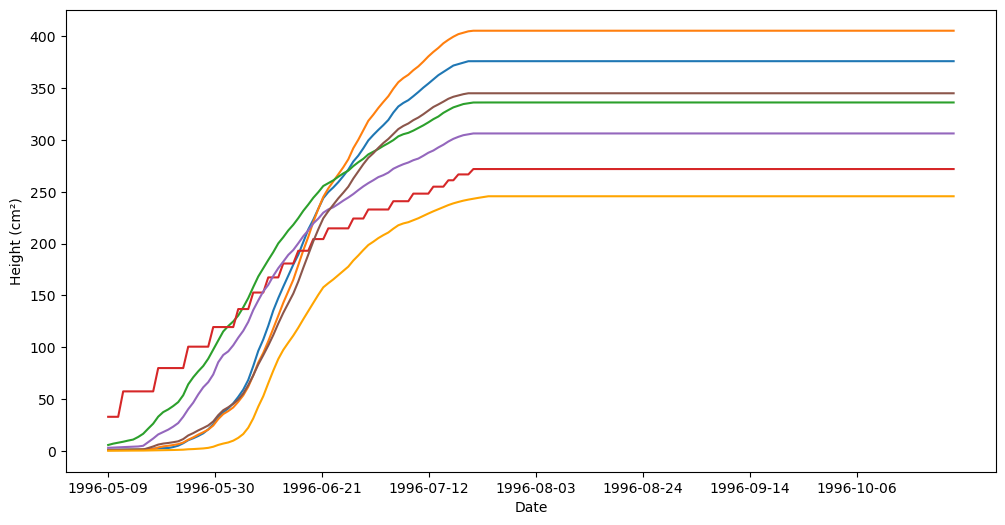

In [7]:
fig, ax = plt.subplots(figsize=(12, 6))
for h in pot_h.values():
    ax.plot(dates, h) #, color=archicrop_color, alpha=0.6)
ax.plot(dates, height_canopy, color=stics_color)
ax.set_xticks(np.arange(0, len(dates)+1, (len(dates)+1)/8))
ax.set_xlabel("Date")
ax.set_ylabel("Height (cm²)")
plt.show()

In [8]:
# filters

In [9]:
for key, value in params_sets.items():
    if filters[key]['filter_1'] and filters[key]['filter_2']:
            print(value)

{'short_phy_height': 2, 'diam_base': 2.5, 'diam_top': 1.5, 'klig': 0.6, 'swmax': 0.55, 'f1': 0.64, 'f2': 0.92, 'insertion_angle': 35, 'scurv': 0.7, 'curvature': 120, 'phyllotactic_angle': 137.5, 'phyllotactic_deviation': 0, 'nb_tillers': 0, 'tiller_delay': 1, 'tiller_angle': 30, 'reduction_factor': 1, 'plant_orientation': 0, 'leaf_lifespan': [200.0, 200.0], 'nb_phy': 14, 'nb_short_phy': 3, 'stem_q': 0.9063, 'rmax': 0.6492, 'skew': 0.0005, 'wl': 0.1081, 'phyllochron': 47.7717, 'plastochron': 31.8642, 'height': 376.1444, 'leaf_area': 8514.9941}
{'short_phy_height': 2, 'diam_base': 2.5, 'diam_top': 1.5, 'klig': 0.6, 'swmax': 0.55, 'f1': 0.64, 'f2': 0.92, 'insertion_angle': 35, 'scurv': 0.7, 'curvature': 120, 'phyllotactic_angle': 137.5, 'phyllotactic_deviation': 0, 'nb_tillers': 0, 'tiller_delay': 1, 'tiller_angle': 30, 'reduction_factor': 1, 'plant_orientation': 0, 'leaf_lifespan': [200.0, 200.0], 'nb_phy': 14, 'nb_short_phy': 3, 'stem_q': 0.9447, 'rmax': 0.8367, 'skew': 0.0007, 'wl': 0.

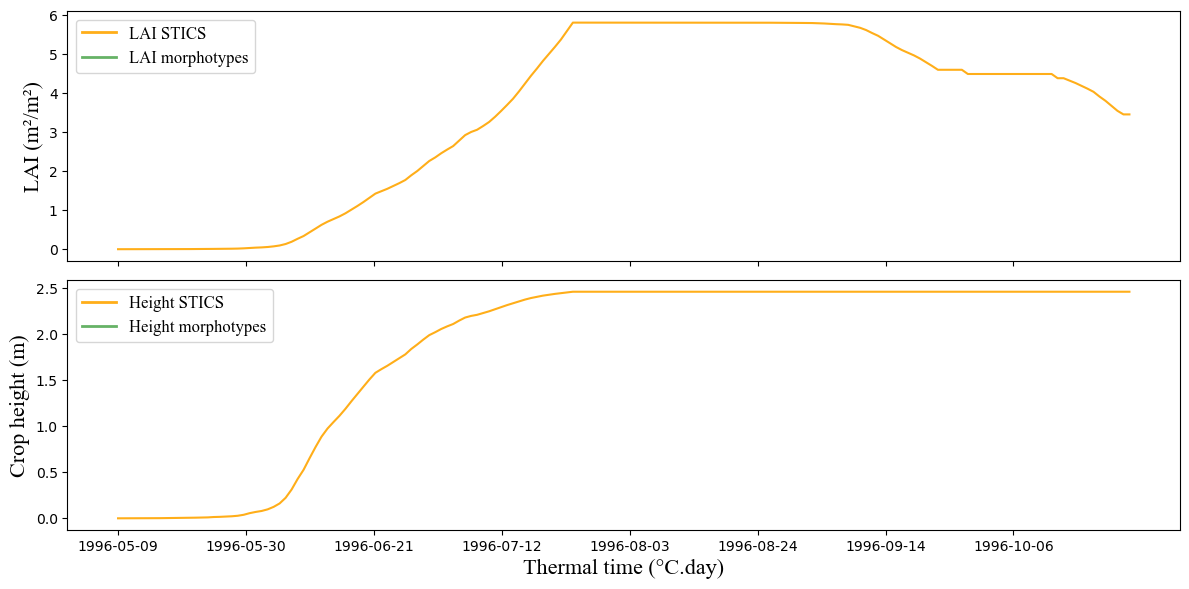

In [10]:
plot_constrainted_vs_realized(dates=dates, 
                              LA_archicrop=realized_la, 
                              height_archicrop=realized_h, 
                              leaf_area_plant=leaf_area_plant, 
                              sen_leaf_area_plant=sen_leaf_area_plant, 
                              height_canopy=height_canopy, 
                              sowing_density=sowing_density)


In [11]:
# Energy in Caribu : W = 0.0864 MJ.day-1
# Irradiance in Caribu : W.m-2 = 0.0864 MJ.m[leaf]-2.day-1
# Incident PAR in STICS : MJ.m[soil]-2.day-1
# Absorbed PAR in STICS : MJ.m[soil]-2.day-1

In [12]:
# 30 minutes per plant on whole growth cycle

TypeError: 'NoneType' object is not iterable

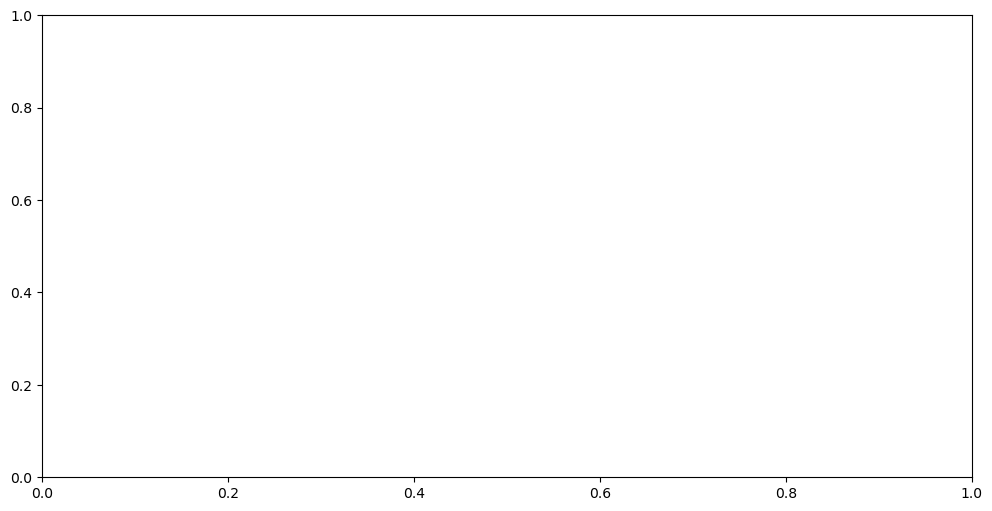

In [13]:
curves = nrj_per_plant
# curves_array = np.array(curves)

# # Calculate the envelope: min and max values for each time point
# min_values = curves_array.min(axis=0)
# max_values = curves_array.max(axis=0)

# Plotting the envelope along with individual curves for context
fig, ax = plt.subplots(figsize=(12, 6))
time_points = dates
for curve in curves:
    ax.plot(time_points, [nrj*sowing_density/row.rad for nrj,row in zip(curve, par_incident)], color=archicrop_color, alpha=0.4, label="ArchiCrop x Caribu")

# ax.fill_between(time_points, min_values, max_values, color="skyblue", alpha=0.4)
# ax.plot(time_points, min_values, color="blue", linestyle="--", label="Min 3D")
# ax.plot(time_points, max_values, color="red", linestyle="--", label="Max 3D")
ax.plot(time_points, par_stics, color=stics_color, label="STICS")

# Labels and legend
ax.set_xticks(np.arange(0, len(dates)+1, (len(dates)+1)/8))
ax.set_xlabel("Thermal time") 
ax.set_ylabel("Fraction of absorbed PAR")
ax.set_title("Fraction of absorbed PAR: 3D canopy vs. STICS")
ax.legend()
plt.show()

In [ ]:
start = 0
end = len(time_points)-1

fig, ax = plt.subplots(figsize=(12, 6))

for curve in curves:
    ax.plot([t for c,t in enumerate(time_points) if c%1==0][start:end], [i*sowing_density for i,par in zip(curve, par_incident)][start:end], alpha=1, linestyle='-')  # Plot each curve (optional for visualization)

ax.plot(time_points[start:end], par_incident[start:end], "--", color="orange", alpha=0.3, label="STICS")
ax.plot(time_points[start:end], [i*par for i,par in zip(par_stics, par_incident)][start:end], color="black", label="STICS")

# plt.plot(thermal_time, raint)

# Labels and legend
ax.set_xticks(np.arange(0, len(dates)+1, (len(dates)+1)/8))
ax.set_xlabel("Thermal time")
ax.set_ylabel("Absorbed PAR")
ax.set_title("Absorbed PAR: 3D canopy vs. STICS")
# plt.legend()
plt.show()

In [ ]:
# see if sum eabs and esoil = 1
# see tests caribu (cf light vege manager in oa incubator)
# compute memory 

$$ raint(t)=0.95⋅parsurrgG⋅trg(t)⋅(1−exp(−extinP⋅(lai(t)+eai(t)))) $$

$$ parsurrgG = 0.48 $$

$$ extinP(maize) = 0.7 $$

In [ ]:
"""
# vertical light interception
cs, ei, df = illuminate(scene, scene_unit='cm')
cs.plot(ei)


# diffuse light interception
sources = skys.sky_sources()
cs, ei, df = illuminate(scene, light=sources, scene_unit='cm')
cs.plot(ei)

# get score per plant
def score(res):
    return pd.Series({'ei':(res.Ei*res.area).sum() / res.area.sum(),
                              'area': res.area.sum()})
df['nump']=nump
df.groupby('nump').apply(score)
"""